In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud, STOPWORDS
import jieba
import matplotlib.pyplot as plt


from urllib.parse import urljoin, urlparse

In [2]:
# initialize search parameters
first_search_term = 'Power BI Training Hong Kong'
search_url = "https://www.google.com/search?q=" + first_search_term
max_pages = 5
current_page = 1
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36'
parser = 'lxml'
container_df = pd.DataFrame()
keyword_list = []

Request without user agent

In [3]:
response = requests.get(search_url)
soup = BeautifulSoup(response.text, parser)

<!DOCTYPE html>
<html lang="zh-HK"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Power BI Training Hong Kong - Google 搜尋</title><script nonce="7s2v08RHNJi/m8wDeKCBug==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=wi
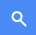
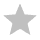
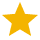
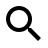

In [4]:
soup

In [5]:
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36'
response = requests.get(search_url, headers={'User-Agent': user_agent})
soup = BeautifulSoup(response.text, parser)

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="zh-HK"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="Anb2GUnhMjfTIX0D2a4a6NPAqPI5GaxxRAiF81XTjHJ2qK4E3Hw3VFM4eaJBgRzz45CNPt624audv+wHOJwfAAEAAABieyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlRydXN0VG9rZW5zIiwiZXhwaXJ5IjoxNjI2MjIwNzk5LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Power BI Training Hong Kong - Google 搜尋</title><script nonce="rWQJlR7osAwgxH1Z8AFFyw==">(function(){window.google={kEI:'4OU4YcizIt6Mr7wPr_Gn0Ao',kEXPI:'31',kBL:'Wtym'};google.sn='web';google.kHL='zh-HK';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}
function n(
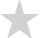
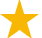
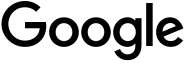

In [6]:
soup

Parse organic div

In [7]:
organic_div = soup.select('div.tF2Cxc')

In [8]:
organic_div[0].select('h3')[0].text

'Power BI培訓'

In [9]:
organic_div[0].select('div.yuRUbf a')[0]['href']

'https://www.nobleprog.hk/zh-hant/power-bi-peixun'

In [10]:
organic_div[0].select('div.yuRUbf a cite')[0].text.split(' ')[0]

'https://www.nobleprog.hk'

In [11]:
organic_div[0].select('div.IsZvec')[0].text

'適合那些從未使用過PowerBI能夠創建合理的儀表板和報告的人。 Pernod Ricard Hong Kong Limited. 課程: Power BI for Business Analysts. Machine Translated. 我真的從\xa0...'

Parse advertisement div

In [12]:
ads_div = soup.select('div.uEierd')

In [13]:
ads_div[0].select('div.MUxGbd')[0].text

'PowerBI 商業智能課程 - 由微軟辦公室專家認證導師任教'

In [14]:
ads_div[0].select('div.MUxGbd')[1].text

'作為一個大數據時代的資訊工作者，掌握 Power BI及 Excel 將對你的工作有決定性的優勢。 公眾課程逢星期六 9:30 - 12:30pm。另設公司客戶培訓，一天內可盡掌握商業數據分析精髓。超過20年歷史。21361234。熱線電話。無數成功案例。'

In [15]:
ads_div[0].select('div.d5oMvf a')[0]['href']

'https://www.uec.edu.hk/office_powerbi'

In [16]:
ads_div[0].select('div.d5oMvf a')[0]['data-pcu']

'https://www.uec.edu.hk/'

Scrape URL of next page

In [17]:
soup.select('td.d6cvqb a')[-1]['href']

'/search?q=Power+BI+Training+Hong+Kong&ei=4OU4YcizIt6Mr7wPr_Gn0Ao&start=10&sa=N&ved=2ahUKEwjIo5eN5-_yAhVexosBHa_4CaoQ8NMDegQIARBR'

In [18]:
next_page = urljoin(base="https://www.google.com/", url=soup.select('td.d6cvqb a')[-1]['href'])
next_page

'https://www.google.com/search?q=Power+BI+Training+Hong+Kong&ei=4OU4YcizIt6Mr7wPr_Gn0Ao&start=10&sa=N&ved=2ahUKEwjIo5eN5-_yAhVexosBHa_4CaoQ8NMDegQIARBR'

In [19]:
response = requests.get(next_page, headers={'User-Agent': user_agent})
response

<Response [200]>

In [20]:
soup = BeautifulSoup(response.text, parser)

Joining and parsing URL

In [21]:
soup.select('td.d6cvqb a')[-1]['href']

'/search?q=Power+BI+Training+Hong+Kong&ei=4eU4YYytJ4aEr7wP4d6CsAQ&start=20&sa=N&ved=2ahUKEwjModmN5-_yAhUGwosBHWGvAEY4ChDw0wN6BAgBEFE'

In [22]:
next_page = urljoin(base="https://www.google.com/", url=soup.select('td.d6cvqb a')[-1]['href'])
next_page

'https://www.google.com/search?q=Power+BI+Training+Hong+Kong&ei=4eU4YYytJ4aEr7wP4d6CsAQ&start=20&sa=N&ved=2ahUKEwjModmN5-_yAhUGwosBHWGvAEY4ChDw0wN6BAgBEFE'

In [23]:
url = organic_div[3].select('div.yuRUbf a')[0]['href']
url

'https://www.computeracademy.com.hk/powerbi-desktop.htm'

In [24]:
urlparse(url).netloc

'www.computeracademy.com.hk'

Find Company name from URL

In [25]:
url = organic_div[3].select('div.yuRUbf a')[0]['href']
url

'https://www.computeracademy.com.hk/powerbi-desktop.htm'

In [26]:
urlparse(url).netloc

'www.computeracademy.com.hk'

In [27]:
urlparse(url).netloc.split('.')

['www', 'computeracademy', 'com', 'hk']

In [28]:
max(urlparse(url).netloc.split('.'), key=len)

'computeracademy'

Extract related searches keywords

In [29]:
keywords = soup.select('a div.s75CSd')
keywords

[<div class="s75CSd OhScic AB4Wff">power <b>bi課程免費</b></div>,
 <div class="s75CSd OhScic AB4Wff"><b>Power BI course HK</b></div>,
 <div class="s75CSd OhScic AB4Wff">power <b>bi證書</b></div>,
 <div class="s75CSd OhScic AB4Wff"><b>Power Query 課程</b></div>,
 <div class="s75CSd OhScic AB4Wff">power <b>bi課程2021</b></div>,
 <div class="s75CSd OhScic AB4Wff"><b>Power BI 課程 2020</b></div>,
 <div class="s75CSd OhScic AB4Wff">power <b>bi香港</b></div>,
 <div class="s75CSd OhScic AB4Wff"><b>Power BI Hong Kong</b></div>]

In [30]:
keyword_list = []
for keyword in keywords:
    keyword_list.append(keyword.text)
keyword_list

['power bi課程免費',
 'Power BI course HK',
 'power bi證書',
 'Power Query 課程',
 'power bi課程2021',
 'Power BI 課程 2020',
 'power bi香港',
 'Power BI Hong Kong']

In [31]:
for kw in keyword_list:
    search_url = "https://www.google.com/search?q=" + kw
    response = requests.get(search_url, headers={'User-Agent': user_agent})
    soup = BeautifulSoup(response.text, parser)
    organic_div = soup.select('div.tF2Cxc')
    heading = organic_div[0].select('h3')[0].text
    print(search_url, '-----', heading)

https://www.google.com/search?q=power bi課程免費 ----- 2021最新Tableau, Power BI, FineReport免費教學資源大公開！
https://www.google.com/search?q=Power BI course HK ----- PowerBI 商業智能分析證書課程
https://www.google.com/search?q=power bi證書 ----- PowerBI 商業智能分析證書課程
https://www.google.com/search?q=Power Query 課程 ----- PowerBI 商業智能分析證書課程
https://www.google.com/search?q=power bi課程2021 ----- PowerBI 商業智能分析證書課程
https://www.google.com/search?q=Power BI 課程 2020 ----- 2021最新Tableau, Power BI, FineReport免費教學資源大公開！
https://www.google.com/search?q=power bi香港 ----- PowerBI 商業智能分析證書課程
https://www.google.com/search?q=Power BI Hong Kong ----- PowerBI 商業智能分析證書課程


Annoynmous functions

In [32]:
# normal function
def multiply_two_numbers (a,b):
    return a * b

In [33]:
multiply_two_numbers(3, 4)

12

In [34]:
# lambda function
x = lambda a, b: a * b
x(3, 4)

12